In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

(-1, 1)

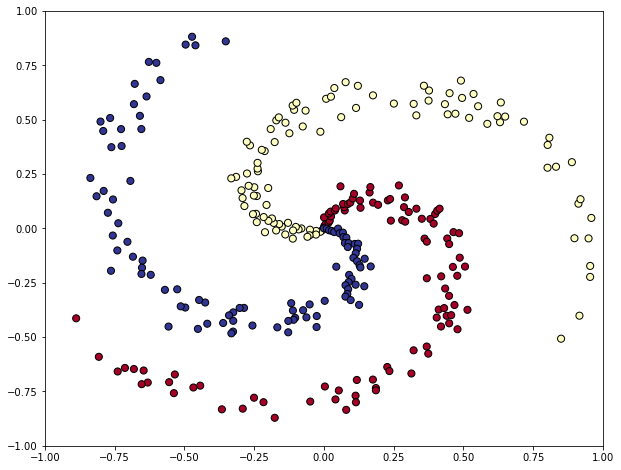

In [2]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j


fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='black', linewidth='1',marker='o', cmap=plt.cm.RdYlBu)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [3]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.096919
iteration 10: loss 0.917310
iteration 20: loss 0.851535
iteration 30: loss 0.822352
iteration 40: loss 0.807594
iteration 50: loss 0.799452
iteration 60: loss 0.794683
iteration 70: loss 0.791765
iteration 80: loss 0.789921
iteration 90: loss 0.788726
iteration 100: loss 0.787937
iteration 110: loss 0.787408
iteration 120: loss 0.787049
iteration 130: loss 0.786803
iteration 140: loss 0.786633
iteration 150: loss 0.786514
iteration 160: loss 0.786431
iteration 170: loss 0.786373
iteration 180: loss 0.786331
iteration 190: loss 0.786302


In [4]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.49


(-1.8712034092398278, 1.8687965907601756)

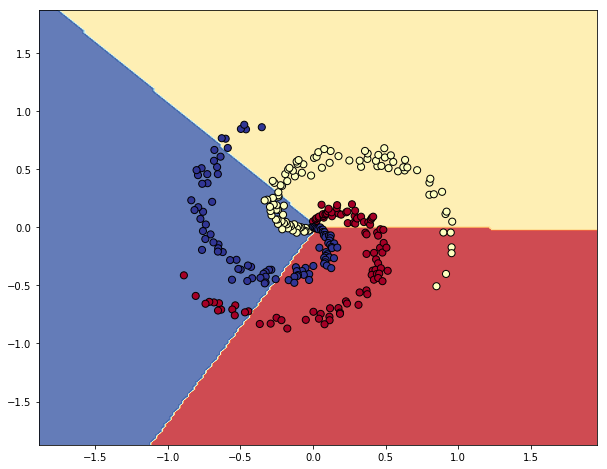

In [5]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()


plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='black', linewidth='1',s= 50, cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

In [6]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098637
iteration 1000: loss 0.294416
iteration 2000: loss 0.266441
iteration 3000: loss 0.251507
iteration 4000: loss 0.248295
iteration 5000: loss 0.247111
iteration 6000: loss 0.246416
iteration 7000: loss 0.245958
iteration 8000: loss 0.245330
iteration 9000: loss 0.245067


In [7]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.98


(-1.8712034092398278, 1.8687965907601756)

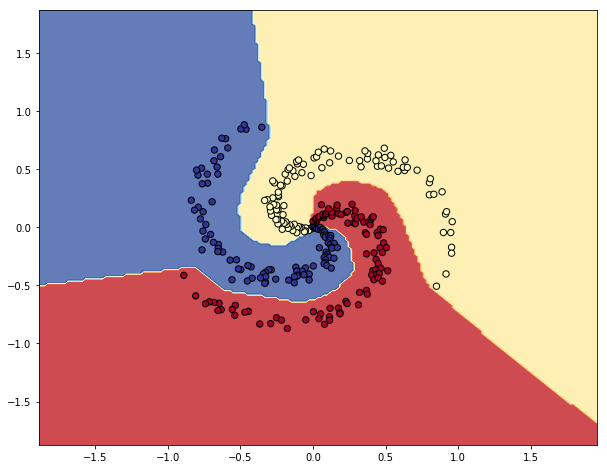

In [8]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)


fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='black', linewidth='1',cmap=plt.cm.RdYlBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

In [9]:
n = 100
r = 2 * np.random.rand(n)
theta = 2 * np.pi * np.random.rand(n)
area = 200 * r**2 * np.random.rand(n)
colors = theta

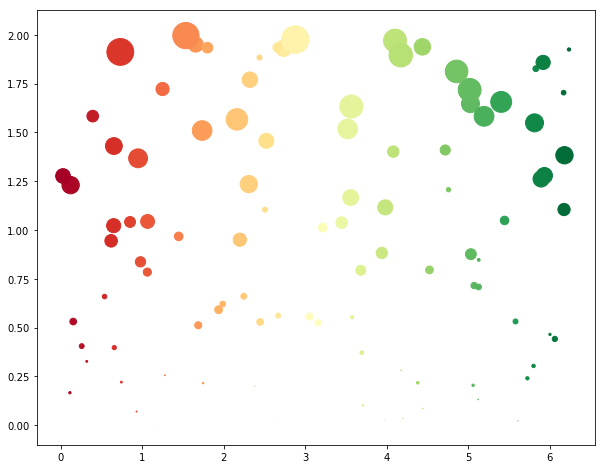

In [10]:
c = plt.scatter(theta, r, c=colors, s=area, cmap=plt.cm.RdYlGn)

# SVM and K-Means

In [11]:
x3 = np.array([[-3, 2], [-6,5], [3,-4], [2, -8]])
y3 = np.array([1, 1, 2, 2])
x3[:]

array([[-3,  2],
       [-6,  5],
       [ 3, -4],
       [ 2, -8]])

In [12]:
x3[:,0]

array([-3, -6,  3,  2])

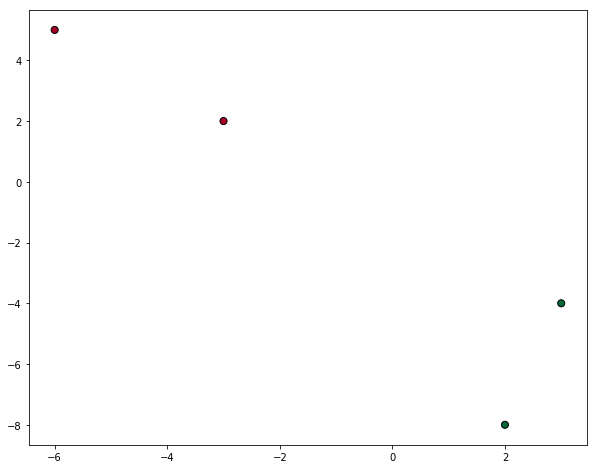

In [13]:
plt.scatter(x3[:,0], x3[:,1], s=50, c=y3,edgecolor='black', linewidth='1', cmap=plt.cm.RdYlGn)

In [14]:
from sklearn.svm import SVC
clf = SVC()

In [15]:
clf.fit(x3, y3)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
clf.predict([[-0.8,-1]])

array([1])

In [17]:
gd = np.array([[i,j] for i in np.arange(-8, 4, 0.6) 
 for j in np.arange(-10, 6, 0.8)])

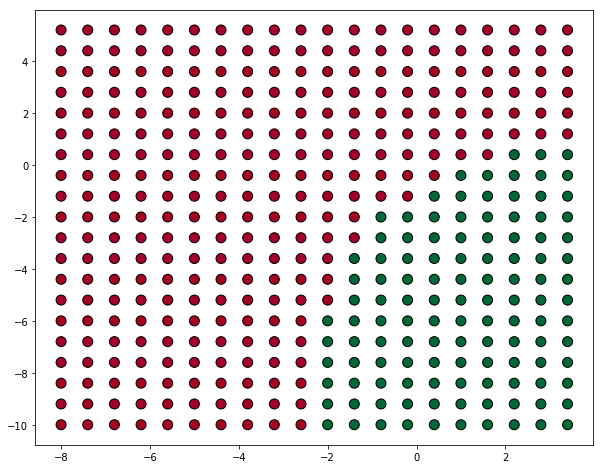

In [18]:
gdc = clf.predict(gd)
plt.scatter(gd[:,0], gd[:,1], s=100, c=gdc, edgecolor='black', linewidth='1', cmap=plt.cm.RdYlGn)

### Using datasets 

In [19]:
from sklearn.datasets import make_classification

In [20]:
x4, y4 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)

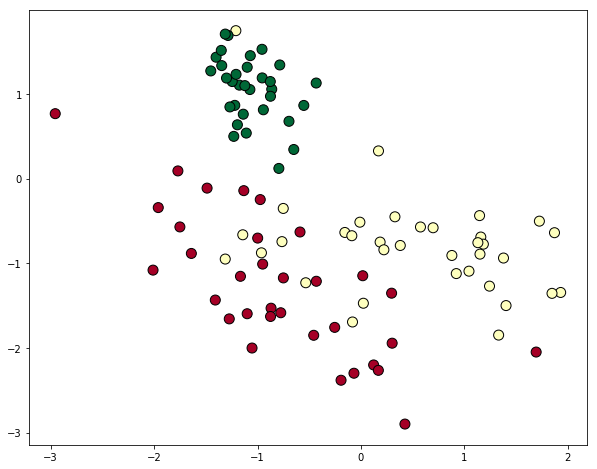

In [21]:
plt.scatter(x4[:,0], x4[:,1], s=100, c=y4, edgecolor='black', linewidth='1', cmap=plt.cm.RdYlGn)

### Training SVM

In [22]:
clf = SVC()
clf.fit(x4,y4)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

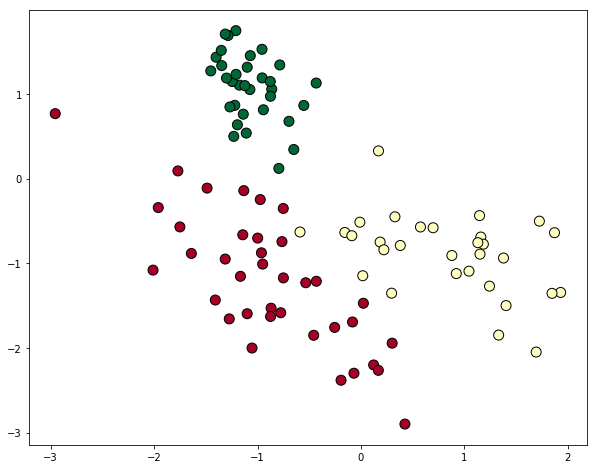

In [23]:
plt.scatter(x4[:,0], x4[:,1], s=100, c=clf.predict(x4), edgecolor='black', linewidth='1', cmap=plt.cm.RdYlGn)

### Something Wrong

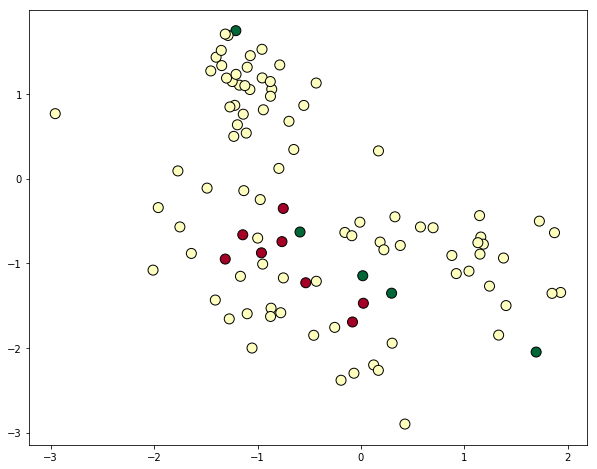

In [24]:
plt.scatter(x4[:,0], x4[:,1], s=100, c=clf.predict(x4)-y4, edgecolor='black', linewidth='1', cmap=plt.cm.RdYlGn)

In [25]:
gd = np.array([[i,j] for i in np.arange(-4, 4, 0.4) 
 for j in np.arange(-3, 4, 0.4)])

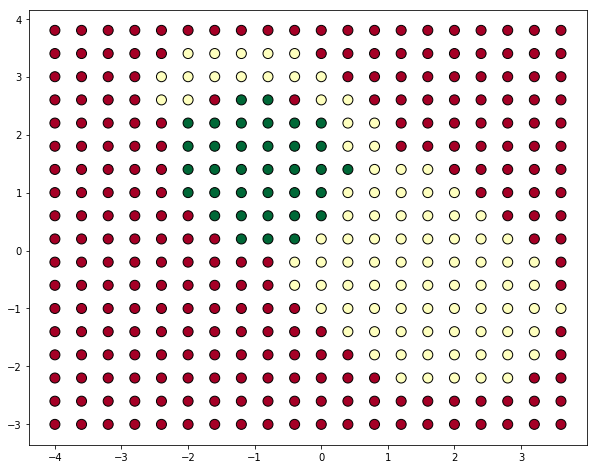

In [26]:
gdc = clf.predict(gd)
plt.scatter(gd[:,0], gd[:,1], s=100, c=gdc, edgecolor='black', linewidth='1',cmap=plt.cm.RdYlGn)

## Using K-Means

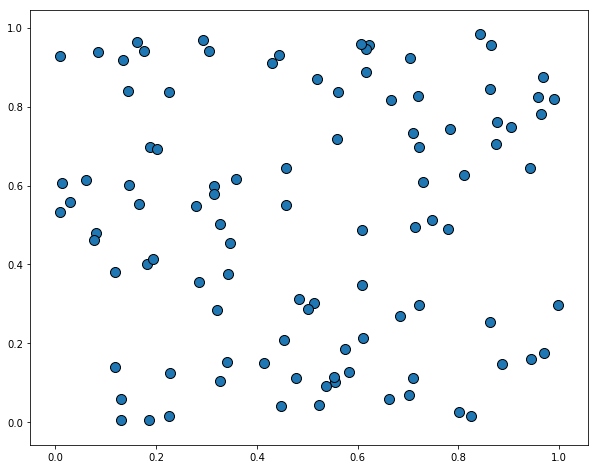

In [27]:
x5 = np.random.rand(100,2)
plt.scatter(x5[:,0], x5[:,1], s=100, edgecolor='black', linewidth='1')

In [28]:
from sklearn.cluster import KMeans

In [29]:
clf = KMeans(n_clusters=3)

In [30]:
clf.fit(x5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
clf.labels_

array([0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0,
       2, 2, 1, 0, 2, 1, 2, 0], dtype=int32)

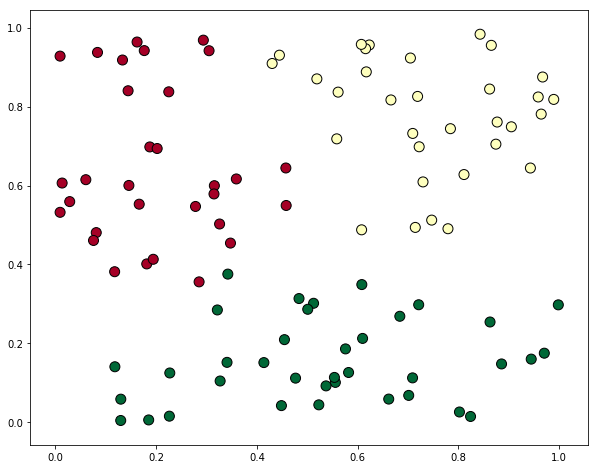

In [32]:
plt.scatter(x5[:,0], x5[:,1], s=100, c=clf.labels_, edgecolor='black', linewidth='1',cmap=plt.cm.RdYlGn)

In [33]:
gd = np.array([[i,j] for i in np.arange(-4, 4, 0.4) 
 for j in np.arange(-3, 3, 0.4)])

In [34]:
gdc = clf.predict(gd)

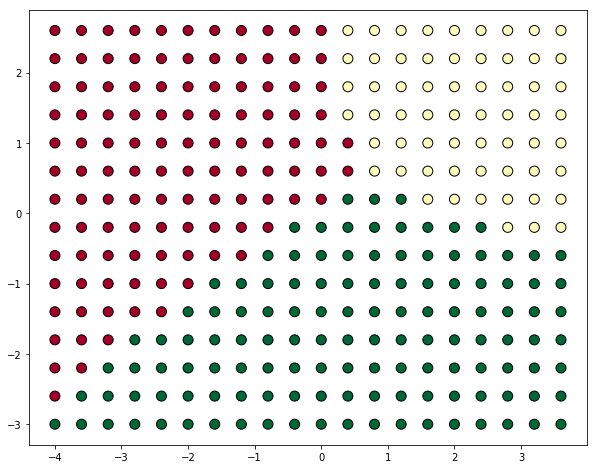

In [35]:
plt.scatter(gd[:,0], gd[:,1], s=100, c=gdc, edgecolor='black', linewidth='1',cmap=plt.cm.RdYlGn)